**Problem  Statement **

**Perform sentimental analysis:**

**1) Extract reviews of any product from ecommerce website like amazon**

**2) Perform emotion mining**

In [ ]:
!pip install spacy
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


!pip install TextBlob
from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
!pip install WordCloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')




import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!pip install nltk
!pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 5.8 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=b886694cfb9aeea536f5bc9b0f2813d96f77fc05a987be342581ee182d8f7890
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
from nltk.corpus import wordnet
import spacy
import pandas as pd
from spacy import displacy
from wordcloud import WordCloud
from nltk.corpus import wordnet

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
from cleantext import clean

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

2. Multi-page web-scraping

In [ ]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}


Looping through multiple pages

In [ ]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

Save results to a Dataframe, then export as CSV

In [ ]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [ ]:

df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nGood smart watch,5.0,Like this product,Reviewed in India on 30 December 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
2,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
3,5.0 out of 5 stars\nLena toh boAt hi Lena,5.0,This incident happened on my birthday last mon...,Reviewed in India on 30 November 2023
4,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,Reviewed in India on 15 November 2023
...,...,...,...,...
105,3.0 out of 5 stars\nOk ok,3.0,Touch response is bit latent .,Reviewed in India on 17 November 2023
106,4.0 out of 5 stars\nBest buy,4.0,Its been 1 year i buy this watch and i can say...,Reviewed in India on 21 September 2023
107,3.0 out of 5 stars\nOk,3.0,Ok,Reviewed in India on 13 November 2023
108,4.0 out of 5 stars\nBattery Life,4.0,The battery drains too fastDoesn't last even a...,Reviewed in India on 18 October 2023


In [ ]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [ ]:
df.head(50)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nGood smart watch,5.0,Like this product,30 December 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
3,5.0 out of 5 stars\nLena toh boAt hi Lena,5.0,This incident happened on my birthday last mon...,30 November 2023
4,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023
5,4.0 out of 5 stars\nPremium quality Value for ...,4.0,"Awesome design, sound and features. Also have ...",31 October 2023
6,5.0 out of 5 stars\nGood product,5.0,Looking beautifulThanks,30 December 2023
7,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
8,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
9,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023


In [ ]:
df.to_csv("BoatSmartWatch_Review.csv")


3. Load Dataset

In [ ]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nGood smart watch,5.0,Like this product,30 December 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
3,5.0 out of 5 stars\nLena toh boAt hi Lena,5.0,This incident happened on my birthday last mon...,30 November 2023
4,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023
...,...,...,...,...
105,3.0 out of 5 stars\nOk ok,3.0,Touch response is bit latent .,17 November 2023
106,4.0 out of 5 stars\nBest buy,4.0,Its been 1 year i buy this watch and i can say...,21 September 2023
107,3.0 out of 5 stars\nOk,3.0,Ok,13 November 2023
108,4.0 out of 5 stars\nBattery Life,4.0,The battery drains too fastDoesn't last even a...,18 October 2023


4. Data Exploration

In [ ]:
reviews.Rating.describe()

count    110.000000
mean       3.872727
std        0.508805
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       108 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [ ]:
reviews.isna().sum()

Title          0
Rating         0
Review         2
Review_Date    0
dtype: int64

In [ ]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nGood smart watch,5.0,Like this product,30 December 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
3,5.0 out of 5 stars\nLena toh boAt hi Lena,5.0,This incident happened on my birthday last mon...,30 November 2023
4,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023


**5. Data Visualization**

Date vs Review Count

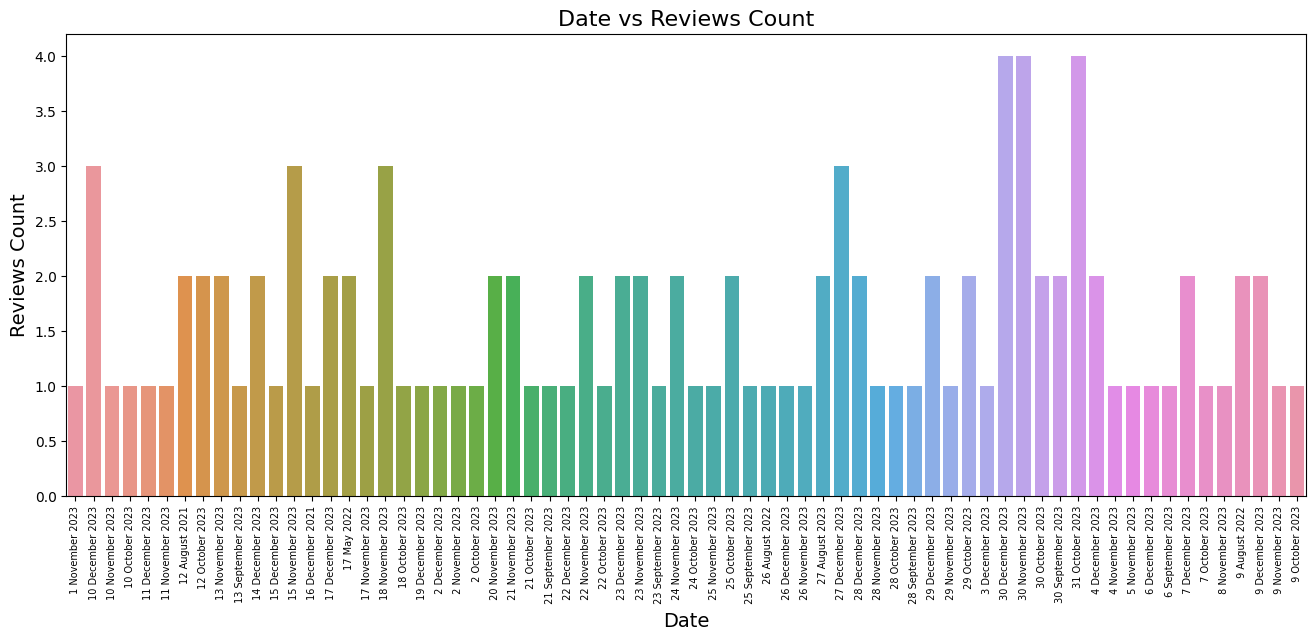

In [ ]:

#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

Percentage of Ratings

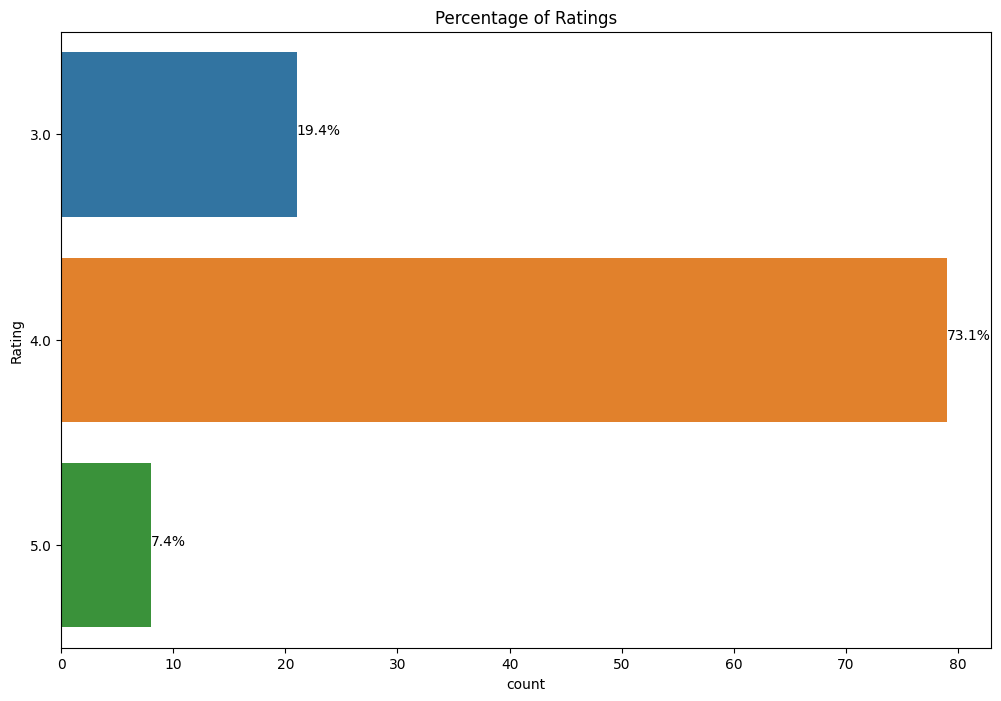

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

**6. BasicText Preprocessing for Sentiment Analysis**

Spelling Correction

In [ ]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    Like this product
1    His smart (model Coat extend plus) watch is sa...
2    The media could not be loaded.\n              ...
3    His incident happened on my birthday last mont...
4    1. Good for Bluetooth calling but very difficu...
Name: Review, dtype: object

In [ ]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Like this product
1,This smart (model Boat extend plus) watch is f...
2,The media could not be loaded.\n ...
3,This incident happened on my birthday last mon...
4,1. Good for Bluetooth calling but very difficu...
...,...
105,Touch response is bit latent .
106,Its been 1 year i buy this watch and i can say...
107,Ok
108,The battery drains too fastDoesn't last even a...


Resetting index

In [ ]:
boat_review.reset_index(drop=True, inplace=True)

In [ ]:
nltk.download('stopwords')


stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Lemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/108 [00:00<?, ?it/s]

In [ ]:

from nltk.corpus import wordnet
import spacy
import pandas as pd
from spacy import displacy

In [ ]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,like product,like product
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
3,incident happened birthday last month lost wat...,this incident happened birthday last month i l...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...


**7. Text Pre-processing Techniques**

A. Removing '@names'

In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [ ]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,like product,like product
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
3,incident happened birthday last month lost wat...,this incident happened birthday last month i l...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
6,looking beautifulthanks,looking beautifulthanks
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


B. Removing links (http | https)

In [ ]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,like product,like product
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
3,incident happened birthday last month lost wat...,this incident happened birthday last month i l...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
6,looking beautifulthanks,looking beautifulthanks
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


C. Removing Review with empty text

In [ ]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,like product,like product
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
3,incident happened birthday last month lost wat...,this incident happened birthday last month i l...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
6,looking beautifulthanks,looking beautifulthanks
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


D. Dropping duplicate rows

In [ ]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,like product,like product
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
3,incident happened birthday last month lost wat...,this incident happened birthday last month i l...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
6,looking beautifulthanks,looking beautifulthanks
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


E. Function to remove emoji

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,like product,like product
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
3,incident happened birthday last month lost wat...,this incident happened birthday last month i l...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
6,looking beautifulthanks,looking beautifulthanks
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


F. Removing Stop words

In [ ]:
with codecs.open("/content/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [ ]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [ ]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,like product,like product
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
3,incident happened birthday last month lost wat...,this incident happened birthday last month i l...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
6,looking beautifulthanks,looking beautifulthanks
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


G. Tokenize 'Clean_Reviews'

In [ ]:
nltk.download('punkt')
from textblob import download_corpora

download_corpora.main()

TextBlob(dataframe['Clean_Reviews'][1]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Finished.


WordList(['smart', 'model', 'boat', 'extend', 'plus', 'watch', 'functioning', 'well', 'worth', 'price', 'r', 'battery', 'beginning', 'lasted', 'day', 'next', 'charge', 'lasted', 'day', 'last', 'settled', 'one', 'day', 'extensive', 'user', 'apps', 'amoled', 'display', 'good', 'touch', 'feature', 'good', 'access', 'apps', 'easily', 'reachable', 'simple', 'browsing', 'feature', 'sleep', 'measurement', 'good', 'taking', 'day', 'time', 'nap', 'night', 'time', 'showing', 'exactly', 'went', 'sleep', 'woke', 'spo', 'measurement', 'neaarer', 'measurement', 'personal', 'digital', 'instrument', 'heart', 'rate', 'measurement', 'also', 'nearer', 'instrument', 'stress', 'also', 'reflecting', 'nearly', 'real', 'condition', 'activity', 'step', 'showing', 'correct', 'distance', 'also', 'good', 'watch', 'taking', 'bike', 'ride', 'walking', 'showing', 'distance', 'covered', 'set', 'target', 'sport', 'feature', 'checked', 'yet', 'fully', 'checked', 'feature', 'functional', 'water', 'resistant', 'yes', 'wa

In [ ]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0                                      [like, product]
1    [smart, model, boat, extend, plus, watch, func...
2    [medium, could, loaded, used, watch, month, bo...
3    [incident, happened, birthday, last, month, lo...
4    [good, bluetooth, calling, difficult, use, blu...
5    [awesome, design, sound, feature, also, custom...
6                           [looking, beautifulthanks]
7    [skipping, part, mostly, covered, review, spon...
8    [review, overviewaverage, boat, today, launche...
9    [drawback, let, know, first, much, st, deliver...
Name: Clean_Reviews, dtype: object

In [ ]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,like product,like product,"[like, product]"
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
3,incident happened birthday last month lost wat...,this incident happened birthday last month i l...,"[incident, happened, birthday, last, month, lo..."
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...,"[good, bluetooth, calling, difficult, use, blu..."
5,awesome design sound feature also customizable...,"awesome design, sound features. also customiza...","[awesome, design, sound, feature, also, custom..."
6,looking beautifulthanks,looking beautifulthanks,"[looking, beautifulthanks]"
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver..."


H. Converting words to Stemmer

In [ ]:
stemmer = SnowballStemmer("english")

In [ ]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,like product
1,smart model boat extend plus watch function we...
2,medium could load use watch month bought first...
3,incid happen birthday last month lost watch pr...
4,good bluetooth call difficult use bluetooth ea...
...,...
103,touch respons bit latent
104,year buy watch say best buy problem occur till...
105,ok
106,batteri drain fastdoesn last even full day


I. Converting words to Lemma

In [ ]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy


,stemmed
0,like product
1,smart model boat extend plus watch functioning...
2,medium could loaded used watch month bought fi...
3,incident happened birthday last month lost wat...
4,good bluetooth calling difficult use bluetooth...
...,...
103,touch response bit latent
104,year buy watch say best buy problem occurs til...
105,ok
106,battery drain fastdoesn last even full day



**8. Basic Feature Extaction**

A. Applying bag of Words without N grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have already created the DataFrame 'dataframe' and processed the 'Clean_Reviews' column

# Create a CountVectorizer
cv = CountVectorizer()

# Fit the CountVectorizer to the data
tweetscv = cv.fit_transform(dataframe.Clean_Reviews)

# Access feature names after fitting
feature_names = cv.get_feature_names_out()

# Print a subset of feature names
print(feature_names[109:200])


['best' 'better' 'beyond' 'bezel' 'big' 'bike' 'bip' 'birthday' 'bit'
 'black' 'bloated' 'blood' 'bluetooth' 'boat' 'body' 'bother' 'bought'
 'box' 'bp' 'break' 'breath' 'breathing' 'bright' 'brightness' 'brings'
 'brnd' 'broken' 'browsing' 'brushed' 'bt' 'budget' 'bug' 'build' 'buildi'
 'built' 'bulb' 'burn' 'burnt' 'bus' 'button' 'buy' 'buyer' 'buying'
 'cable' 'cache' 'calculated' 'calculating' 'calculation' 'calculator'
 'calender' 'call' 'called' 'caller' 'callin' 'calling' 'calorie' 'calory'
 'cals' 'camera' 'cannot' 'carddesign' 'care' 'case' 'category' 'center'
 'centerbefore' 'chahiye' 'chain' 'change' 'changed' 'changer' 'charge'
 'charger' 'charging' 'charm' 'cheap' 'check' 'checked' 'checking'
 'chennai' 'childish' 'chinese' 'choice' 'choor' 'choose' 'claim'
 'claimed' 'classic' 'clean' 'clear' 'clearing']


In [ ]:
print(feature_names[:100])

['aaj' 'able' 'absolutely' 'ac' 'accept' 'acceptable' 'acceptance'
 'accepts' 'access' 'accidentally' 'account' 'accuracy'
 'accuracybatteryyou' 'accuracycomparing' 'accurate' 'accurately' 'ach'
 'ackward' 'activate' 'activating' 'active' 'activites' 'activity'
 'actual' 'actually' 'adapter' 'add' 'added' 'addition' 'adjust' 'advance'
 'advertised' 'aggregate' 'alarm' 'alert' 'alexa' 'allowed' 'allows'
 'almost' 'along' 'also' 'aluminium' 'always' 'amaze' 'amazfit' 'amazon'
 'amoled' 'amount' 'analog' 'android' 'angle' 'animal' 'animation'
 'anniversary' 'another' 'answer' 'anyone' 'anyonefor' 'anything'
 'anywhere' 'aod' 'apart' 'app' 'appaccuracyaccuracy'
 'appaccuracybatteryfinal' 'appearance' 'appeared' 'apple' 'application'
 'apps' 'appyou' 'around' 'arre' 'asakte' 'aside' 'asks' 'aspect'
 'assistant' 'assisted' 'atm' 'attached' 'attaching' 'attention'
 'attractive' 'audio' 'aur' 'auto' 'available' 'average' 'away' 'awesome'
 'back' 'background' 'bad' 'badge' 'band' 'bank' 'bar' '

In [ ]:
print(tweetscv.toarray()[100:200])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [ ]:
dataframe = dataframe.reset_index(drop=True)

In [ ]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [ ]:
corpus[3]

'incid happen birthday last month lost watch preciou girlfriend gift watch birthday last year last month birthday someon stole hostel room thought would use exactli today th found thrown gate hostel date theft also th look condit seem abl use watch due batteri drain definit thought faulti watch tri break watch fail everyth threw watch get wet chennai rain today final got today happi got watch watch absolut safe also turn charg main toh ummid hi choor di thi k ye millega wapi mujh lekin aaj feka hua mila aur work condit mai hai aur kya chahiy thank boat'

Applying Countvectorizer (Creating the Bag of Words model)

In [ ]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(106, 1546)

In [ ]:
feature_names[:20]

array(['aaj', 'able', 'absolutely', 'ac', 'accept', 'acceptable',
       'acceptance', 'accepts', 'access', 'accidentally', 'account',
       'accuracy', 'accuracybatteryyou', 'accuracycomparing', 'accurate',
       'accurately', 'ach', 'ackward', 'activate', 'activating'],
      dtype=object)

In [ ]:

cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

AttributeError: ignored

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming you have already created the DataFrame 'dataframe' and processed the 'Clean_Reviews' column

# Create a CountVectorizer
cv = CountVectorizer()

# Fit the CountVectorizer to the data
tweetscv = cv.fit_transform(dataframe.Clean_Reviews)

# Access feature names after fitting
feature_names = cv.get_feature_names_out()

# Create a DataFrame with the count matrix and feature names
count_df = pd.DataFrame(tweetscv.toarray(), columns=feature_names)

# Display the DataFrame
print(count_df)


     aaj  able  absolutely  ac  accept  acceptable  acceptance  accepts  \
0      0     0           0   0       0           0           0        0   
1      0     0           0   0       0           0           0        0   
2      0     0           0   1       0           0           0        0   
3      1     1           1   0       0           0           0        0   
4      0     0           0   0       0           0           0        0   
..   ...   ...         ...  ..     ...         ...         ...      ...   
101    0     0           0   0       0           0           0        0   
102    0     0           0   0       0           0           0        0   
103    0     0           0   0       0           0           0        0   
104    0     0           0   0       0           0           0        0   
105    0     0           0   0       0           0           0        0   

     access  accidentally  ...  yahoo  ye  year  yellow  yes  yet  youtube  \
0         0          

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming you have already created the DataFrame 'dataframe' and processed the 'Clean_Reviews' column

# Create a CountVectorizer
cv = CountVectorizer()

# Fit the CountVectorizer to the data
tweetscv = cv.fit_transform(dataframe.Clean_Reviews)

# Access feature names after fitting
feature_names = cv.get_feature_names_out()

# Create a DataFrame with the count matrix and feature names
count_df = pd.DataFrame(tweetscv.toarray(), columns=feature_names)

# Display the DataFrame
print(count_df)


     aaj  able  absolutely  ac  accept  acceptable  acceptance  accepts  \
0      0     0           0   0       0           0           0        0   
1      0     0           0   0       0           0           0        0   
2      0     0           0   1       0           0           0        0   
3      1     1           1   0       0           0           0        0   
4      0     0           0   0       0           0           0        0   
..   ...   ...         ...  ..     ...         ...         ...      ...   
101    0     0           0   0       0           0           0        0   
102    0     0           0   0       0           0           0        0   
103    0     0           0   0       0           0           0        0   
104    0     0           0   0       0           0           0        0   
105    0     0           0   0       0           0           0        0   

     access  accidentally  ...  yahoo  ye  year  yellow  yes  yet  youtube  \
0         0          

C. TF-IDF Vectorizer

In [ ]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [ ]:
corpus[4]

'good bluetooth call difficult use bluetooth earbud everytim one choos speaker phone want call notif watch default call possibl spo constant featur one go phone menu click get heart rate monitor alway set frequenc heart rate monitor min regard notif avail app googl calend gmail outlook whatsapp twitter linkedin yahoo youtub suffici infact disabl whatsapp distract sm otp shown watch good help screen bright good outdoor indoor use watch vibrat good use prompt watch face plenti collect beauti band fit good daili use take take watch bluetooth callin featur requir els take non bluetooth call featur face peculiar problem whenev turn alway display watch screen suddenli turn well connect phone display medium play call heard watch could turn restart reset use continu discharg complet charg watch display come howev problem appear'

Applying TF-IDF Vectorizer

In [ ]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [ ]:
tfidf_v.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'alarm', 'alarm set', 'alert',
       'alexa', 'alexa support', 'alexa watch'], dtype=object)

In [ ]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,absolut,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,...,worth price,would,would recommend,would recommend go,wrist,xtend,xtend smartwatch,xtend watch,ye,year
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.0,0.038497,0.000000,0.000000,0.000000,0.000000,0.000000,0.033828,0.0,...,0.044278,0.000000,0.0,0.0,0.038497,0.000000,0.0,0.000000,0.067657,0.000000
2,0.000000,0.0,0.000000,0.028039,0.068203,0.021422,0.028039,0.028039,0.064265,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.022734,0.0,0.025386,0.021422,0.000000
3,0.084709,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.076696,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.064718,0.080299
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
102,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.361458
103,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
104,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


D. Named Entity Recognition (NER)

In [ ]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'like product smart model boat extend plus watch functioning well worth price r battery beginning lasted day next charge lasted day last settled one day extensive user apps amoled display good touch feature good access apps easily reachable simple browsing feature sleep measurement good taking day time nap night time showing exactly went sleep woke spo measurement neaarer measurement personal digital instrument heart rate measurement also nearer instrument stress also reflecting nearly real condition activity step showing correct distance also good watch taking bike ride walking showing distance covered set target sport feature checked yet fully checked feature functional water resistant yes water resistant checked bathing drizzle rain time display good number display available cloud sufficient always feature working model available feature pleasing could skin made available display wrist put rest raise respectively feature functional feature always enabled otherwise functional bluetoo

Parts Of Speech (POS) Tagging

In [ ]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[:50]:
    print(token,token.pos_)

like ADP
product NOUN
smart ADJ
model NOUN
boat NOUN
extend VERB
plus CCONJ
watch VERB
functioning VERB
well ADV
worth ADJ
price NOUN
r NOUN
battery NOUN
beginning NOUN
lasted VERB
day NOUN
next ADJ
charge NOUN
lasted VERB
day NOUN
last ADV
settled VERB
one NUM
day NOUN
extensive ADJ
user NOUN
apps NOUN
amoled VERB
display NOUN
good ADJ
touch NOUN
feature VERB
good ADJ
access NOUN
apps NOUN
easily ADV
reachable ADJ
simple ADJ
browsing VERB
feature NOUN
sleep NOUN
measurement NOUN
good ADJ
taking NOUN
day NOUN
time NOUN
nap NOUN
night NOUN
time NOUN


Filtering the nouns and verbs only

In [ ]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['drain', 'message', 'see', 'notification', 'flash', 'light', 'functioning', 'camera', 'weather', 'calender', 'stopwatch', 'timer', 'alarm', 'breath', 'functioning', 'find', 'phone', 'setting', 'improved', 'tune', 'function', 'measuring', 'heart', 'rate', 'placed', 'surface', 'body', 'check', 'animal', 'volume', 'controlling', 'app', 'time', 'open', 'read', 'message', 'calender', 'month', 'check', 'date', 'rest', 'month', 'boat', 'app', 'phone', 'issue', 'syncing', 'bought', 'watch', 'check', 'mom', 'night', 'time', 'course', 'manufacturer', 'claimed', 'measurement', 'blood', 'pressure', 'using', 'satisfaction', 'experience', 'medium', 'loaded', 'watch', 'month', 'bought', 'sale', 'keep', 'reading', 'review', 'tip', 'trick', 'ensure', 'function', 'watch', 'working', 'display', 'price', 'category', 'inch', 'battery', 'usage', 'waking', 'screen', 'alarm', 'notification', 'day', 'checking', 'time', 'day', 'charging', 'time', 'hour', 'quality', 'charging', 'cable', 'provided', 'use', 'powe

Counting the noun & verb tokens

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,185
1,boat,88
2,feature,75
3,time,62
4,day,55
5,smartwatch,48
6,display,44
7,xtend,44
8,use,43
9,app,40


Visualizing results (Barchart for top 10 nouns + verbs)

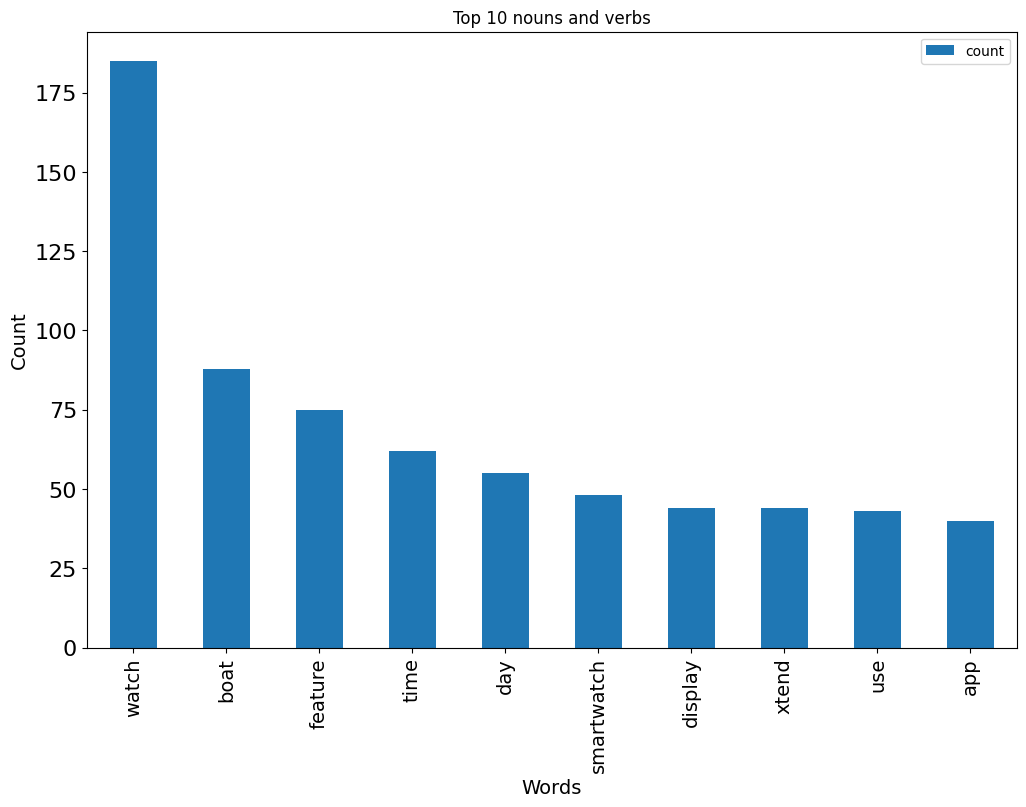

In [ ]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

**9. Feature Extraction**

A. BOW Features

In [ ]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

B. TF-IDF Features

In [ ]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

10. Fetch sentiments Using TextBlob

In [ ]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [ ]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,101
neg,5



Let's calculate subjectivity and Polarity

In [ ]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,like product,like product,"[like, product]",0.000000,0.000000
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
3,incident happened birthday last month lost wat...,this incident happened birthday last month i l...,"[incident, happened, birthday, last, month, lo...",0.526923,0.217308
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...,"[good, bluetooth, calling, difficult, use, blu...",0.555556,0.303333


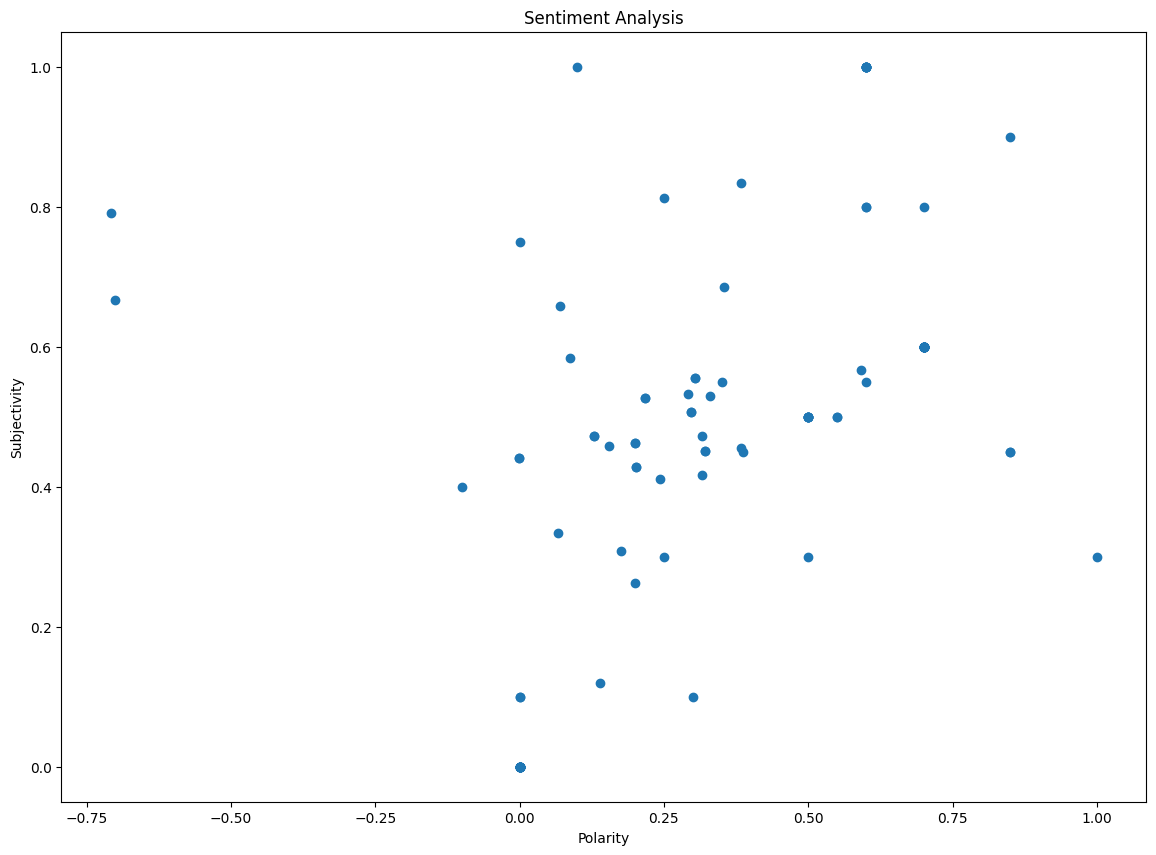

In [ ]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [ ]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()


,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,like product,like product,"[like, product]",0.000000,0.000000,pos
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452,pos
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274,pos
3,incident happened birthday last month lost wat...,this incident happened birthday last month i l...,"[incident, happened, birthday, last, month, lo...",0.526923,0.217308,pos
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...,"[good, bluetooth, calling, difficult, use, blu...",0.555556,0.303333,pos


11. Story Generation and Visualization

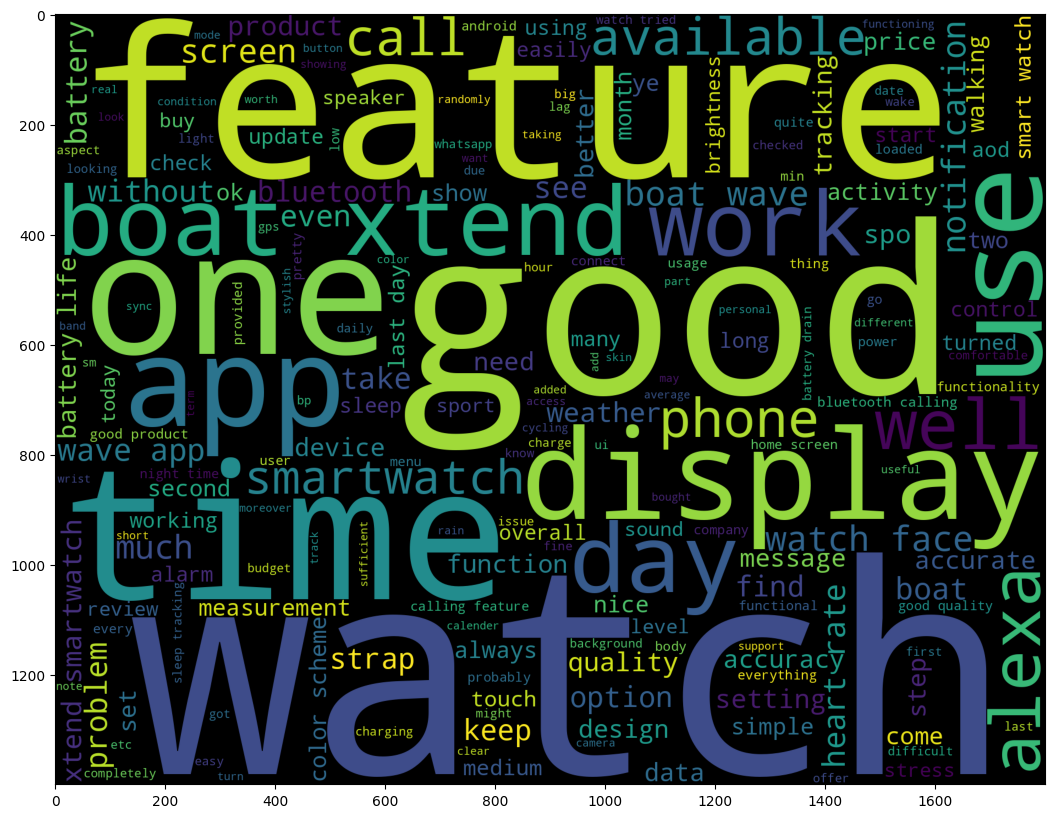

In [ ]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

A. Most common words in positive Review

In [ ]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

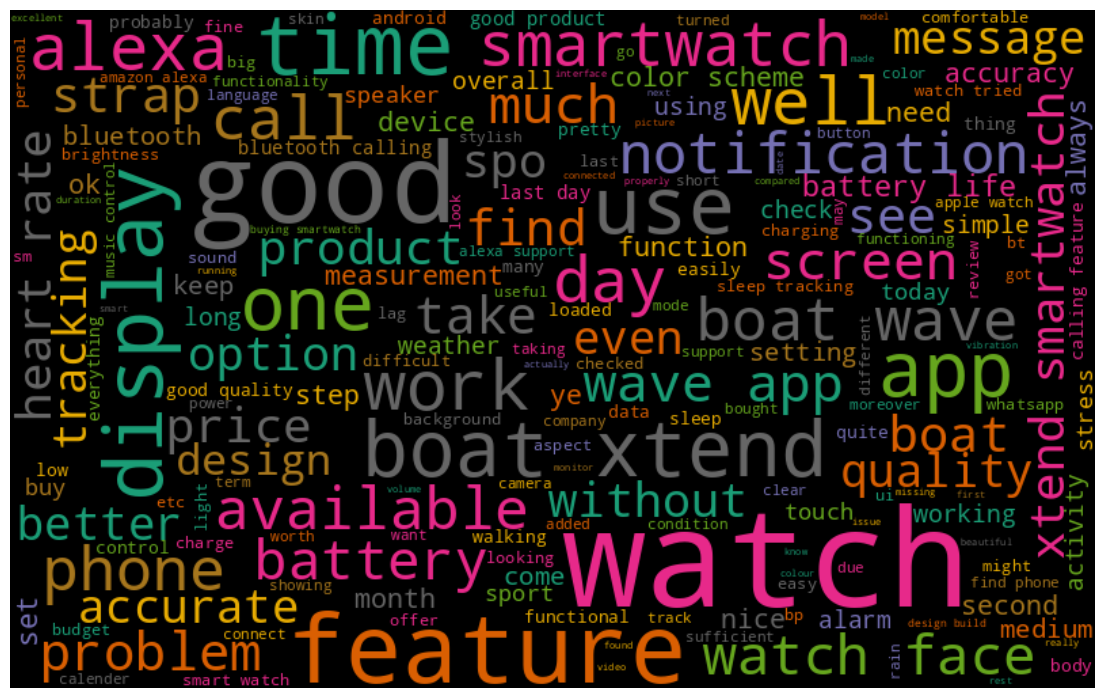

In [ ]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

B. Most common words in negative Review

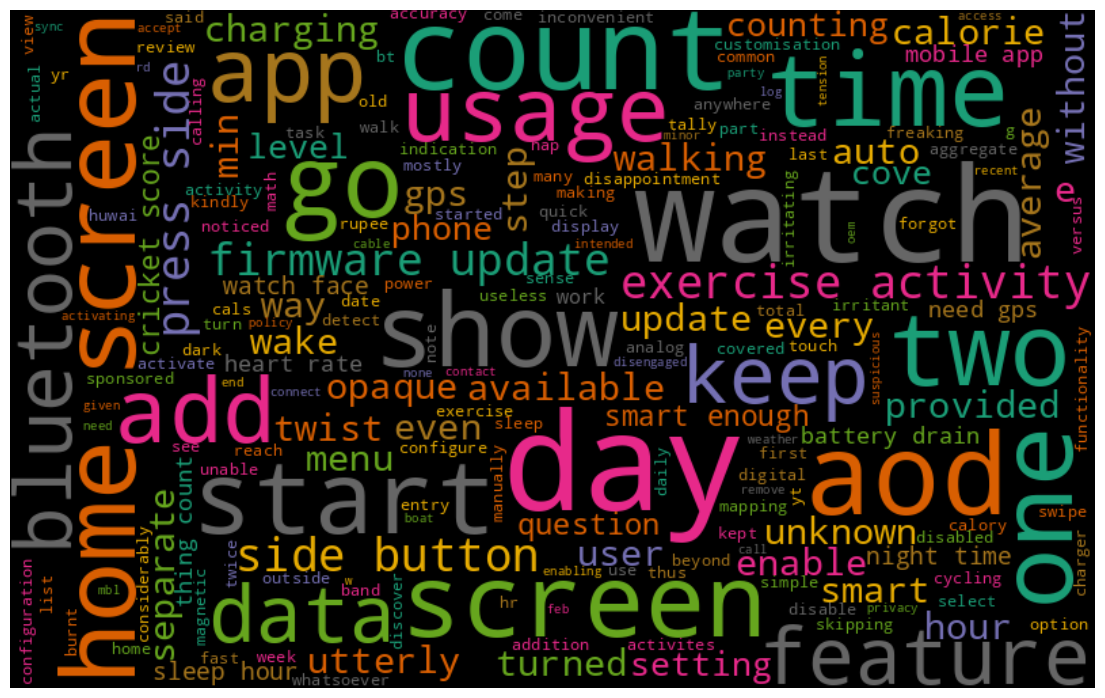

In [ ]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)